# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

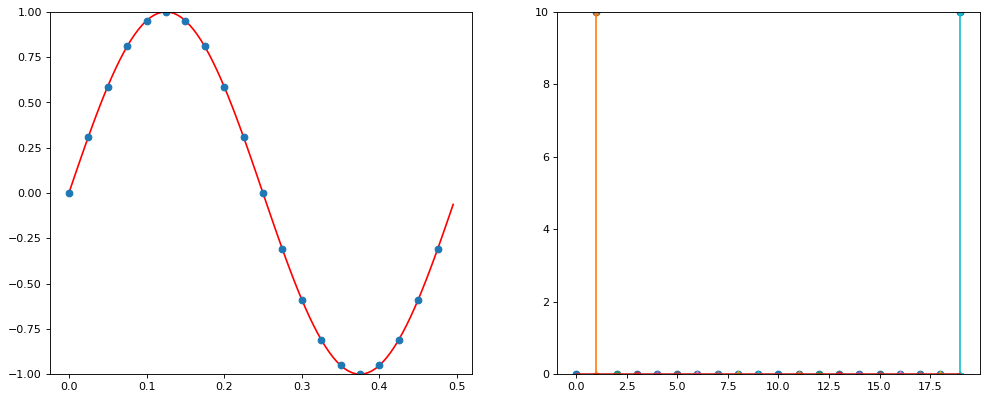

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [2]:
# Zdefiniuj funckję

def signal_f(A=1, LP= 1, w=40, f=2.0):
    T = 1.0/f
    TW = 1.0/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : A*sin(2*pi*t*f)
    signal = FUNC(t)
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)]) 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    signal1 = abs(signal1)        

    freqs = range(int(n))


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    show()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [3]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

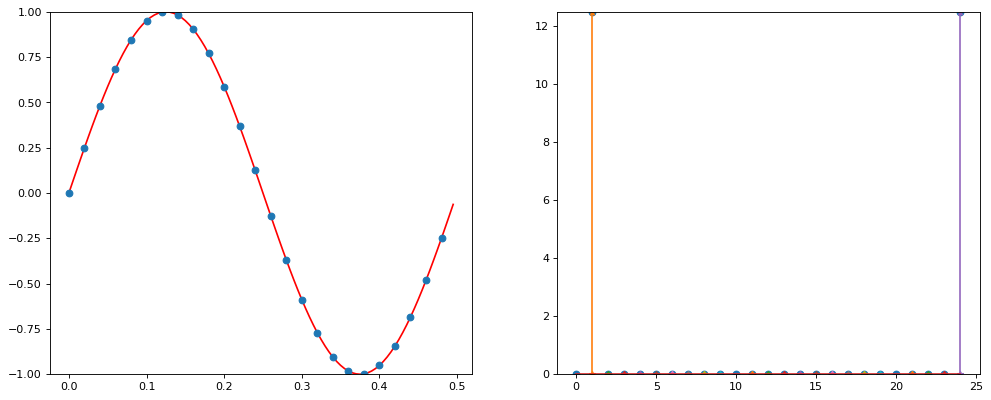

In [4]:
# w=50
signal_f(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [5]:
# popraw oś OX
def signal_f(A=1, LP= 1, w=40, f=2.0):
    T = 1.0/f
    TW = 1.0/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : A*sin(2*pi*t*f)
    signal = FUNC(t)
    
    fig = plt.figure(figsize=(15, 15), dpi=80)   
    ax = fig.add_subplot(211)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)]) 
    ax.plot(t, signal, 'o')
    
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('y = signal(x)')

    signal1 = fft(signal)
    signal1 = abs(signal1)        

    freqs = range(int(n))


    ax = fig.add_subplot(212)
    xticks = np.arange(0, len(t)+1, 1)
    ax.set_xticks(xticks)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude')
    
    show()

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [6]:
# Podpisz osie wykresów

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

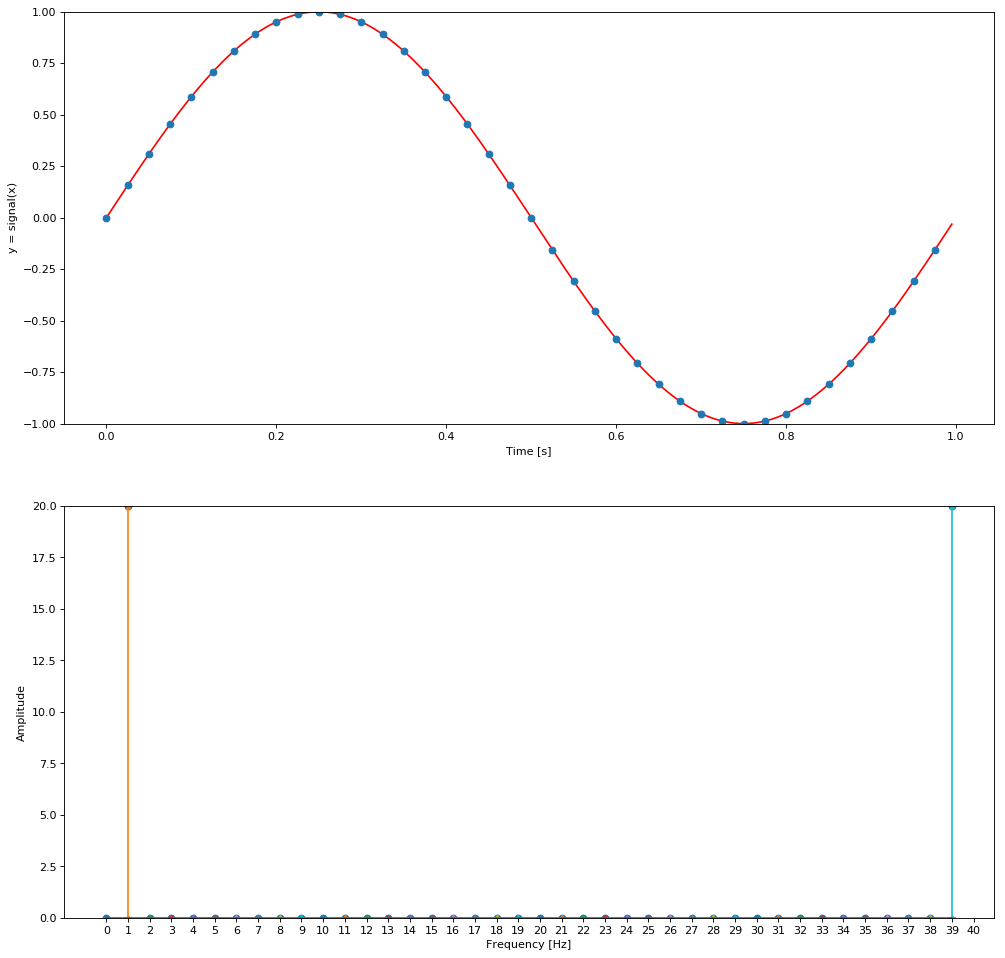

In [7]:
# f=1, A=1, LP=1
signal_f(f=1, A=1, LP=1)

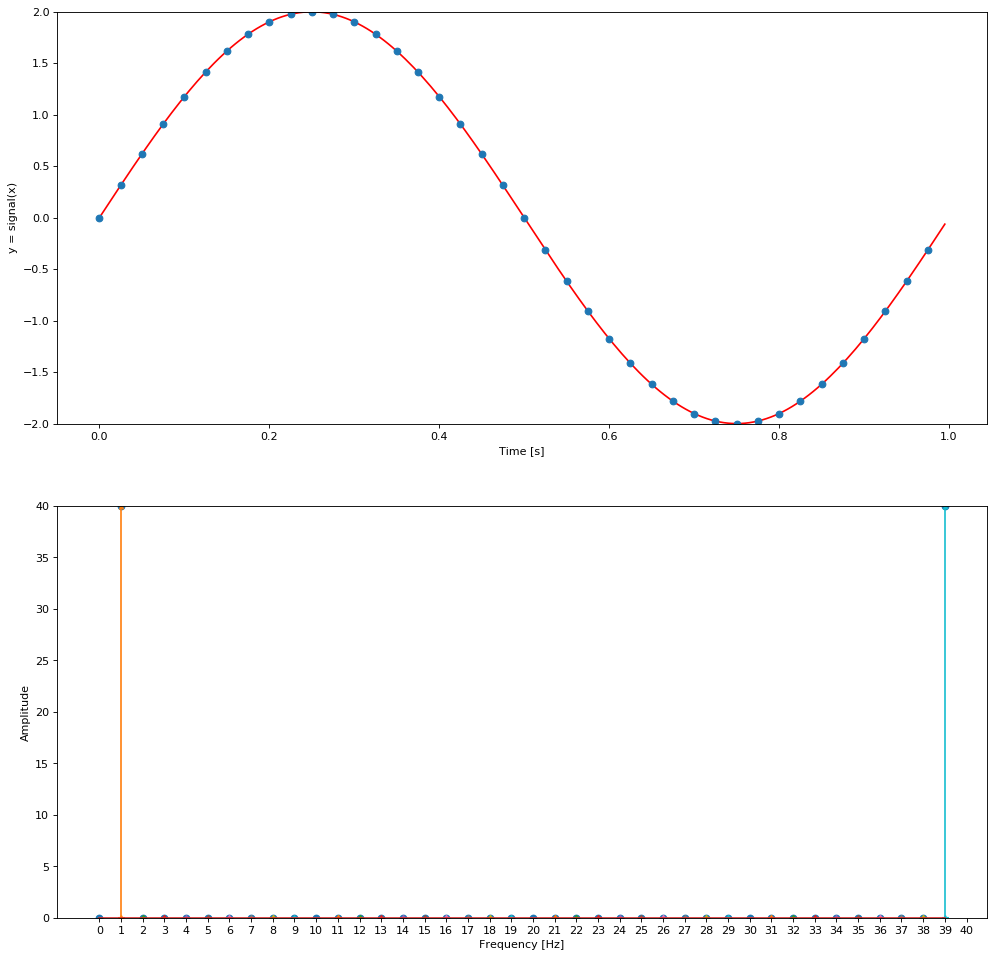

In [8]:
# f=1, A=2, LP=1
signal_f(f=1, A=2, LP=1)

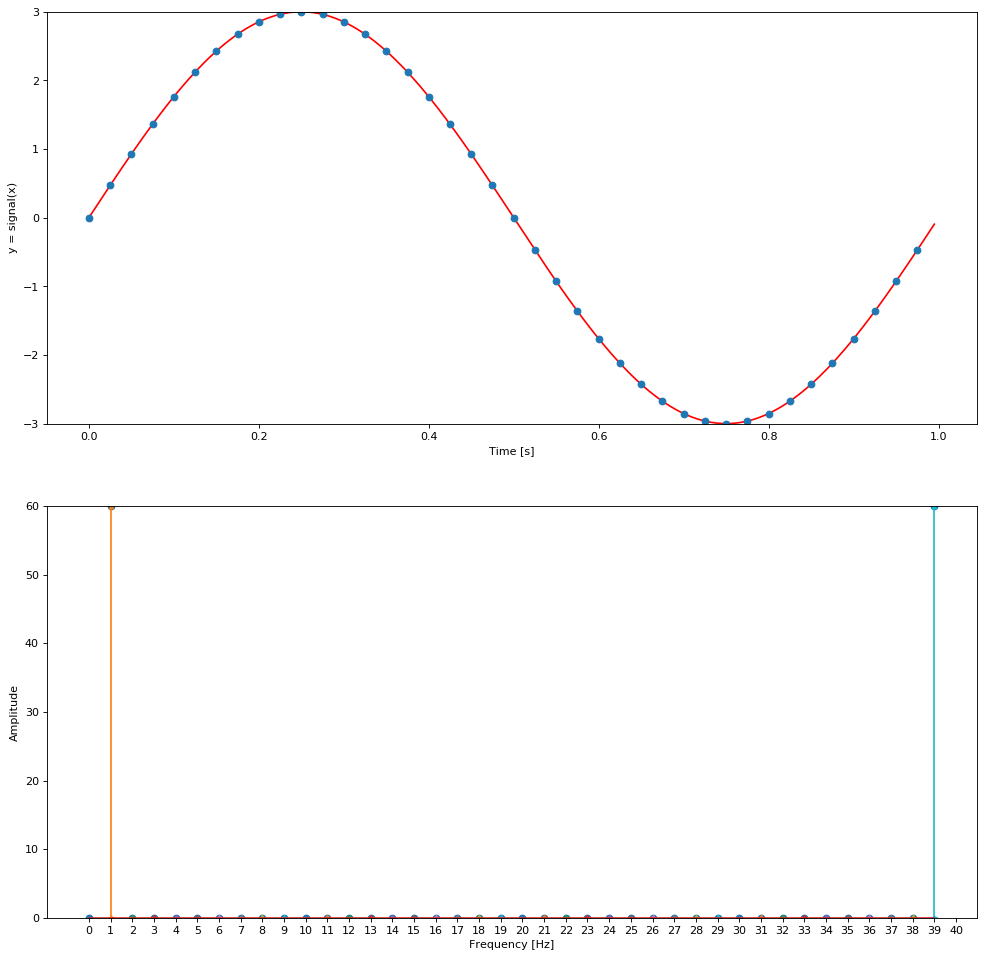

In [9]:
# f=1, A=3, LP=1
signal_f(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

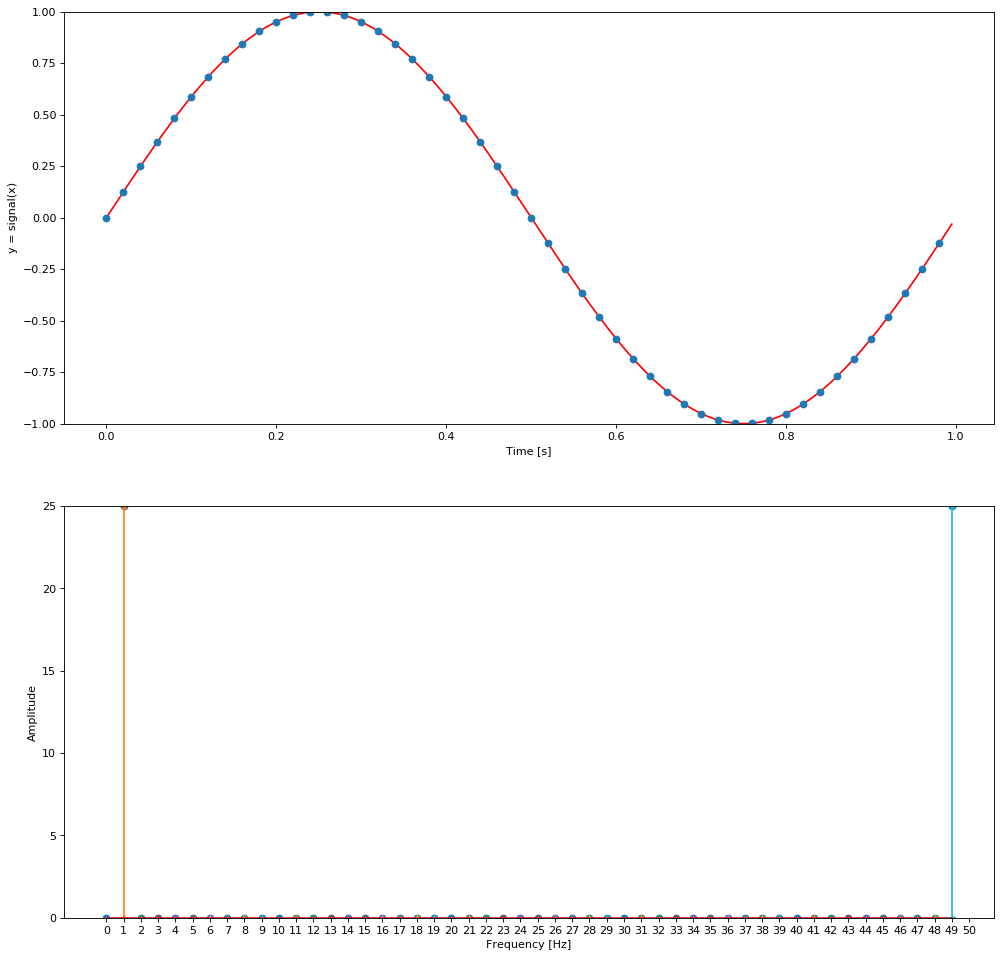

In [10]:
# f=1, w=50, LP=1
signal_f(f=1, w=50, LP=1)

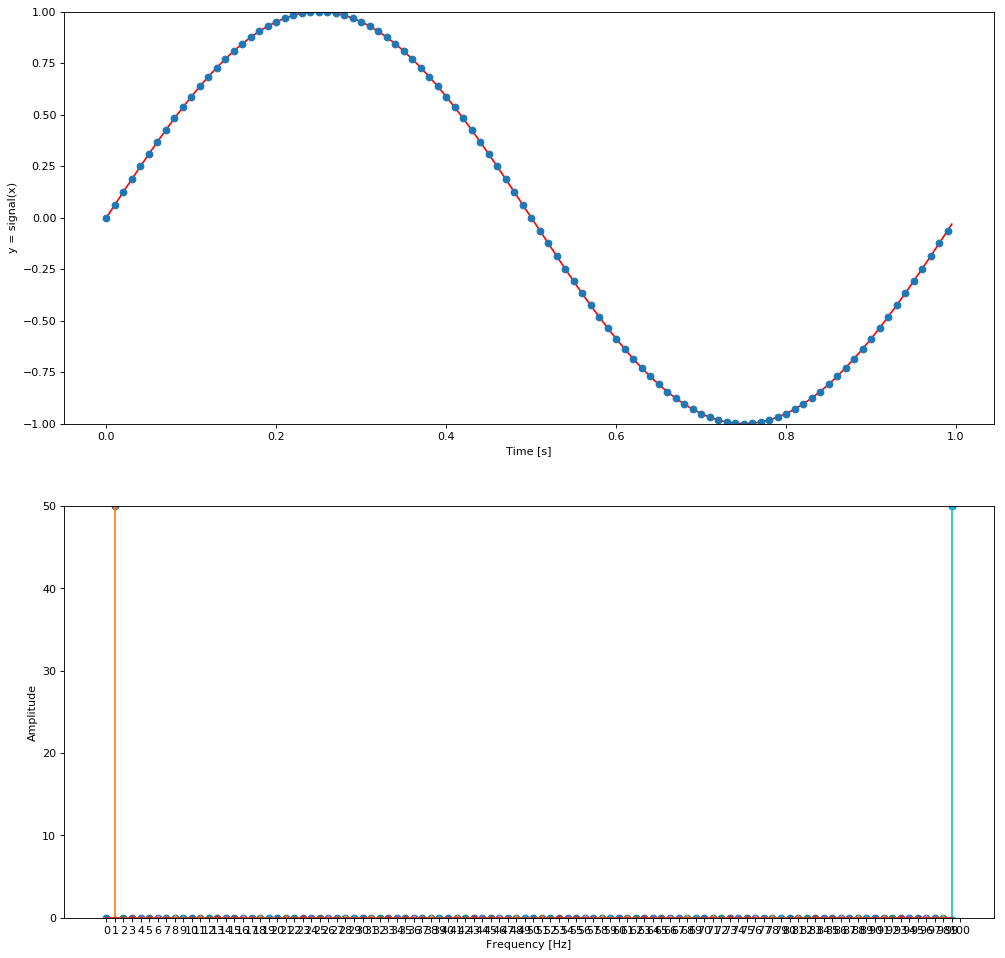

In [11]:
# f=1, w=100, LP=1
signal_f(f=1, w=100, LP=1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [12]:
# popraw oś OY
def signal_f(A=1, LP= 1, w=40, f=2.0):
    T = 1.0/f
    TW = 1.0/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : A*sin(2*pi*t*f)
    signal = FUNC(t)
    
    fig = plt.figure(figsize=(15, 15), dpi=80)   
    ax = fig.add_subplot(211)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)]) 
    ax.plot(t, signal, 'o')
    
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('y = signal(x)')

    signal1 = fft(signal)
    signal1 = abs(signal1)
    signal1=signal1/(w/2)/LP/T

    freqs = range(int(n))


    ax = fig.add_subplot(212)
    xticks = np.arange(0, len(t)+1, 1)
    ax.set_xticks(xticks)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude')
    
    show()

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

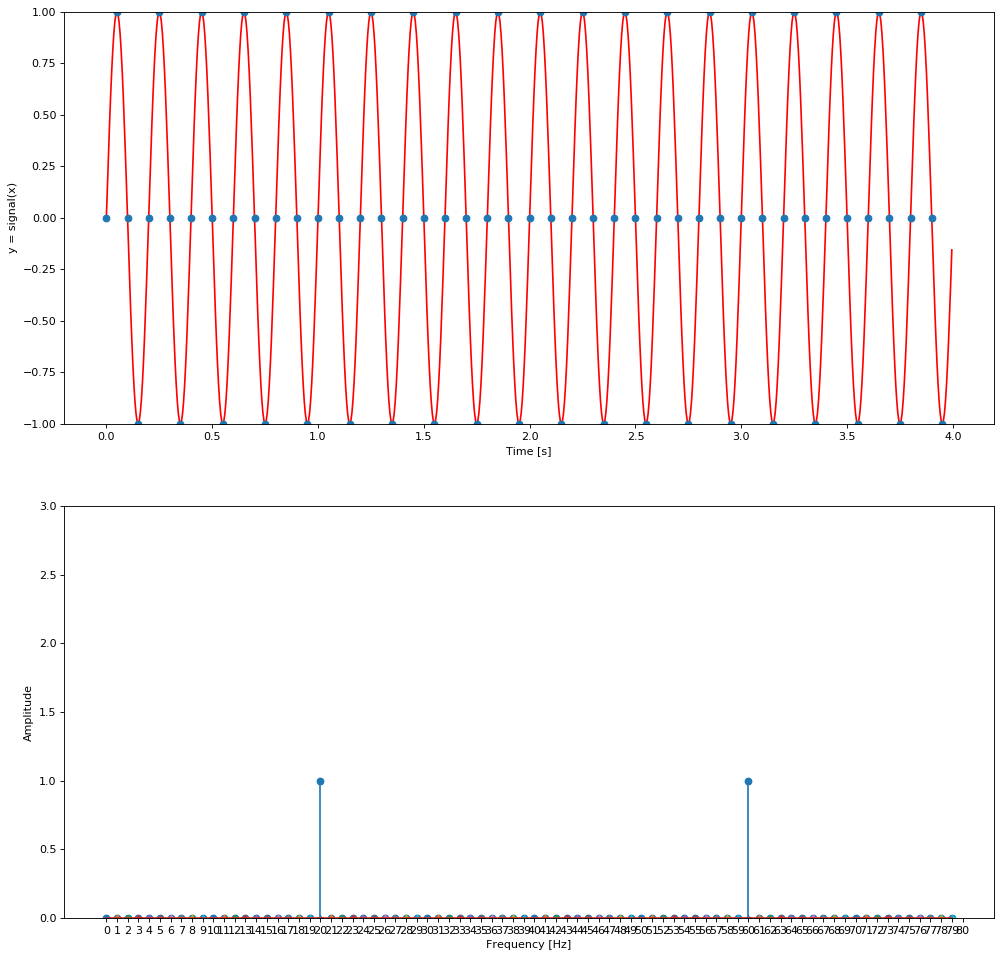

In [13]:
# f=5, w=20, LP=20
signal_f(f=5, w=20, LP=20)

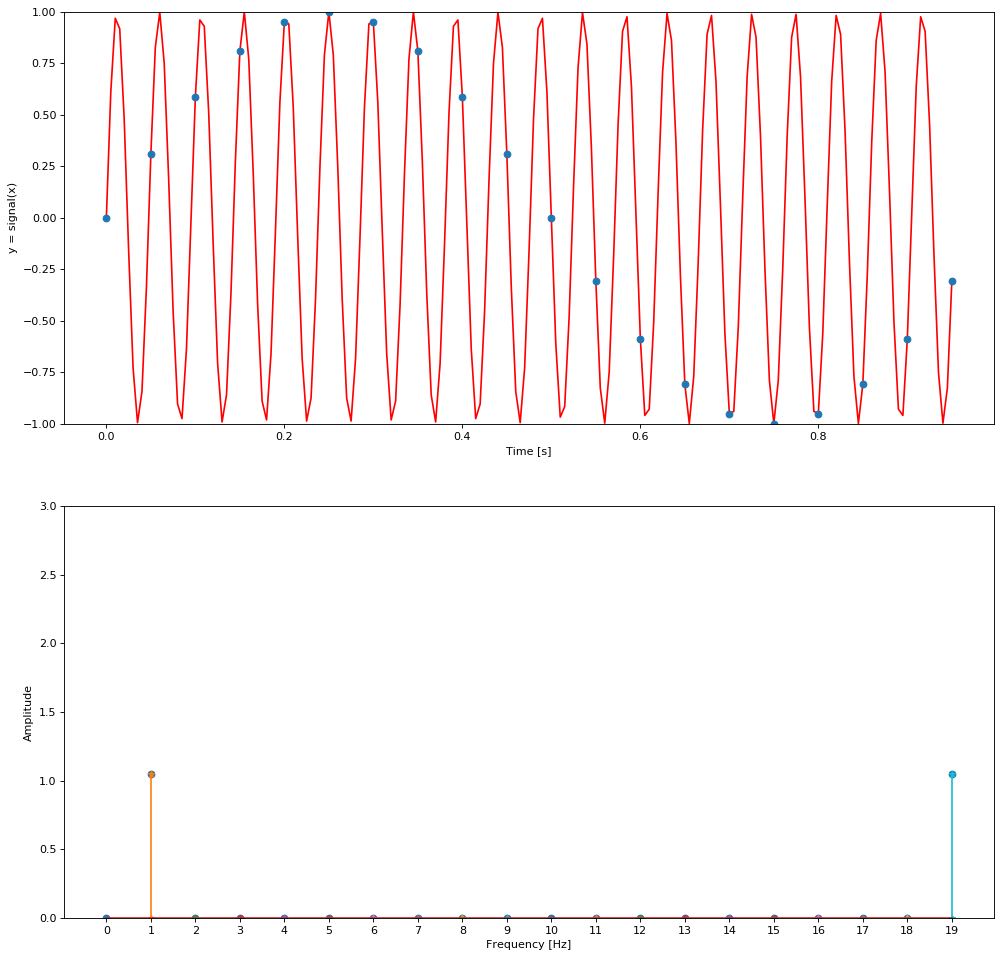

In [14]:
# f=21, w=20, LP=20
signal_f(f=21, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

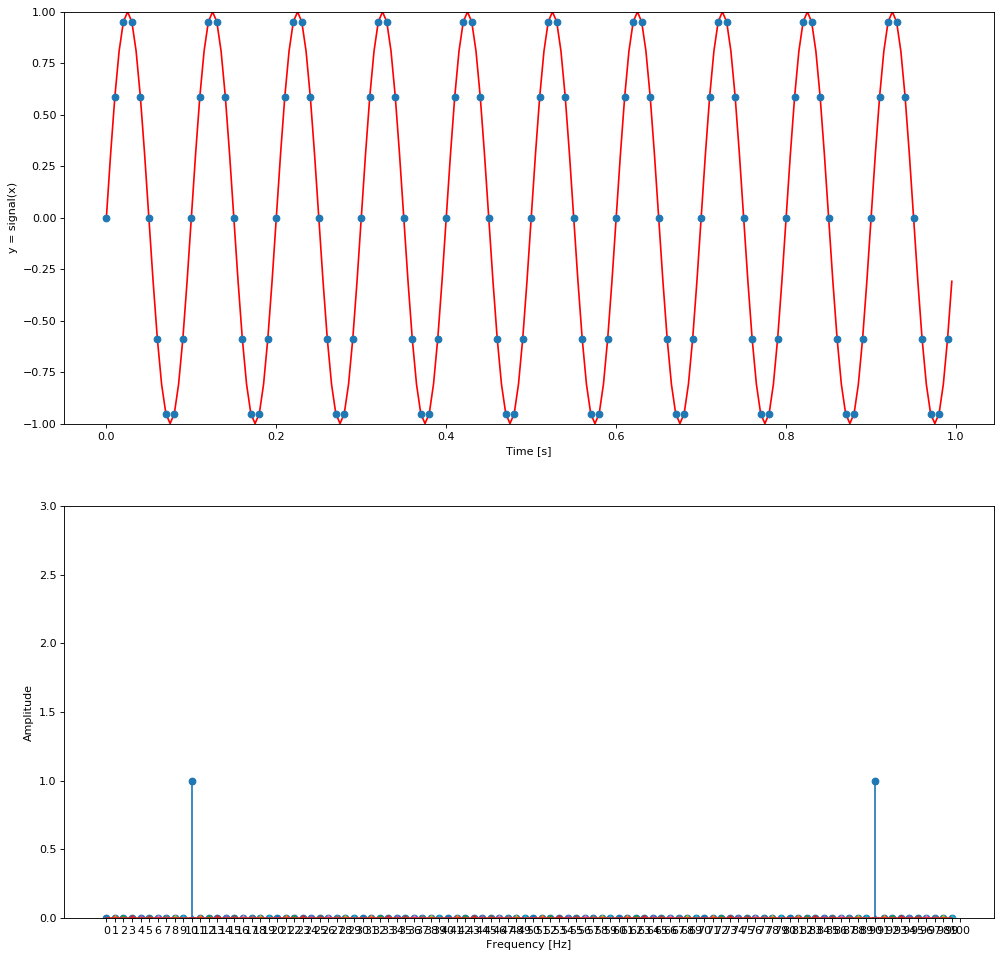

In [15]:
# f=10, w=100, A=1, LP=10
signal_f(f=10, w=100, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

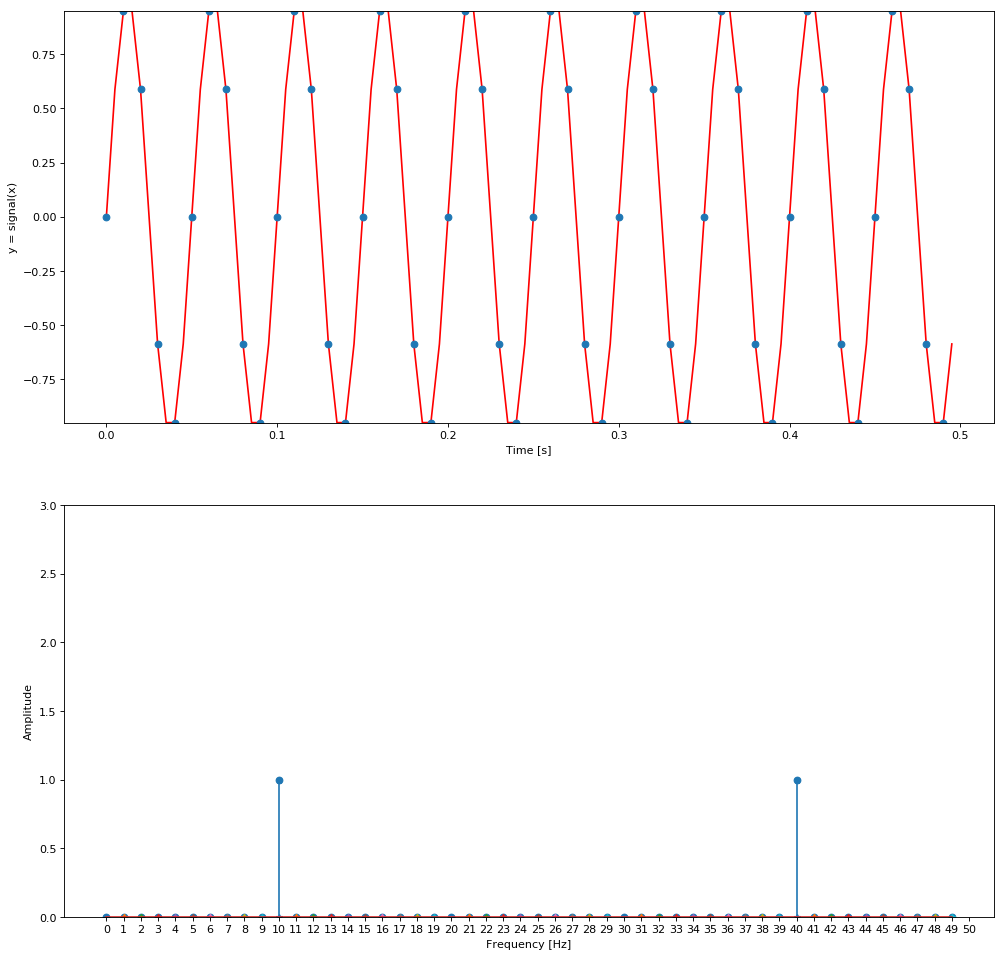

In [16]:
# f=20, w=100, A=1, LP=10
signal_f(f=20, w=100, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

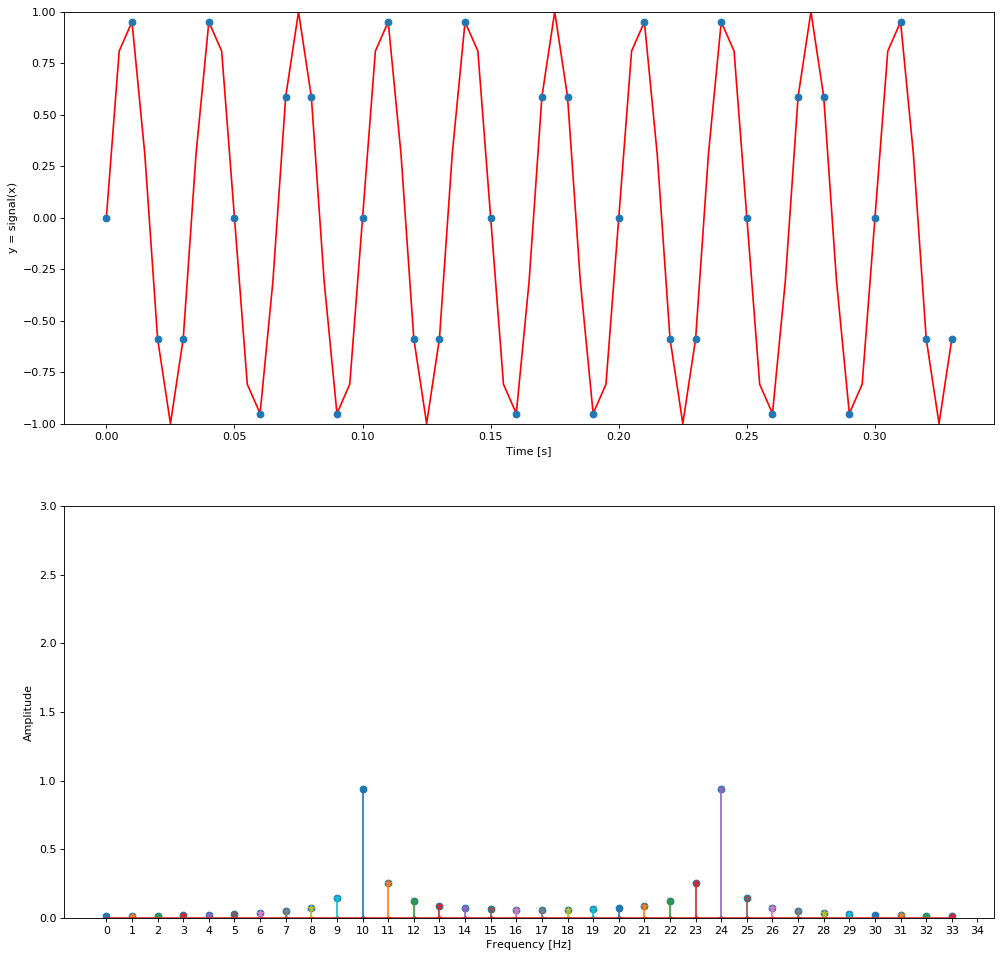

In [17]:
# f=30, w=100, A=1, LP=10
signal_f(f=30, w=100, LP=10)
# z powodu zle dobranej czestotiwosci probkowania do czestotliwosci sygnalu

iv) $sin(2*pi*t*f)$, $f=40Hz$

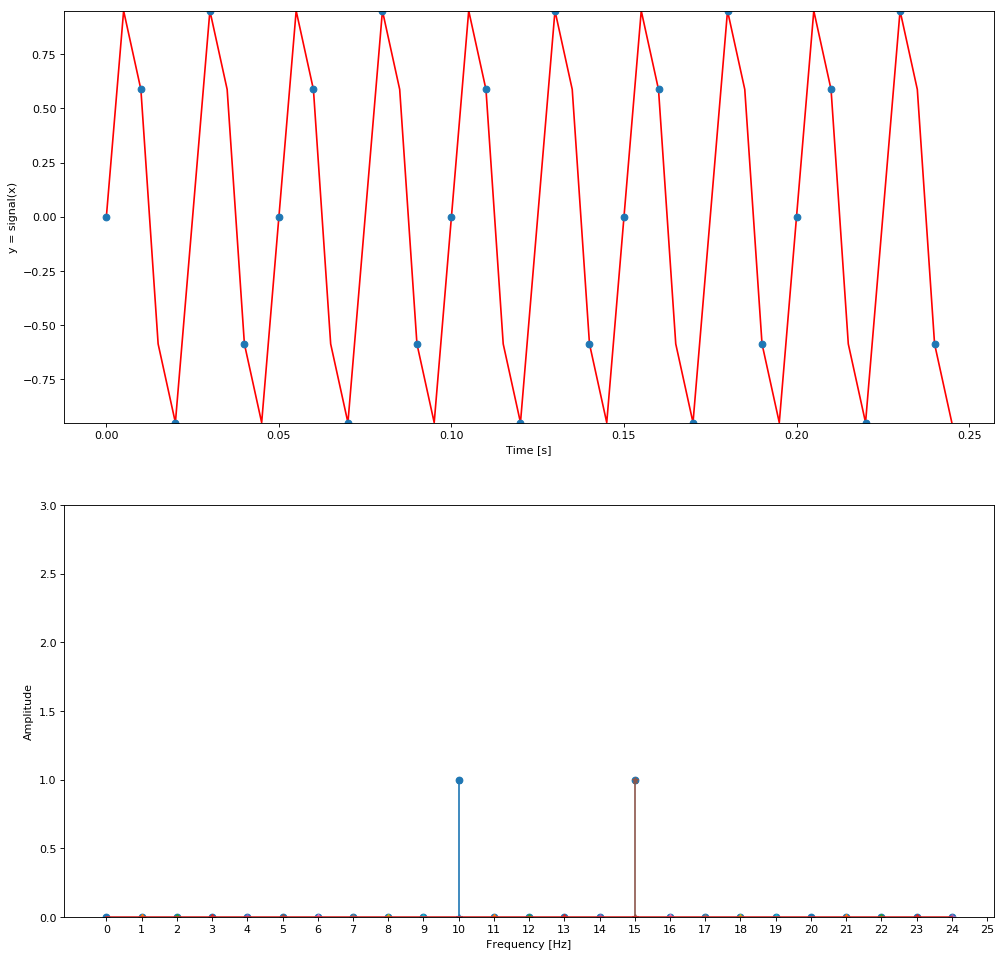

In [18]:
# f=40, w=100, A=1, LP=10
signal_f(f=40, w=100, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

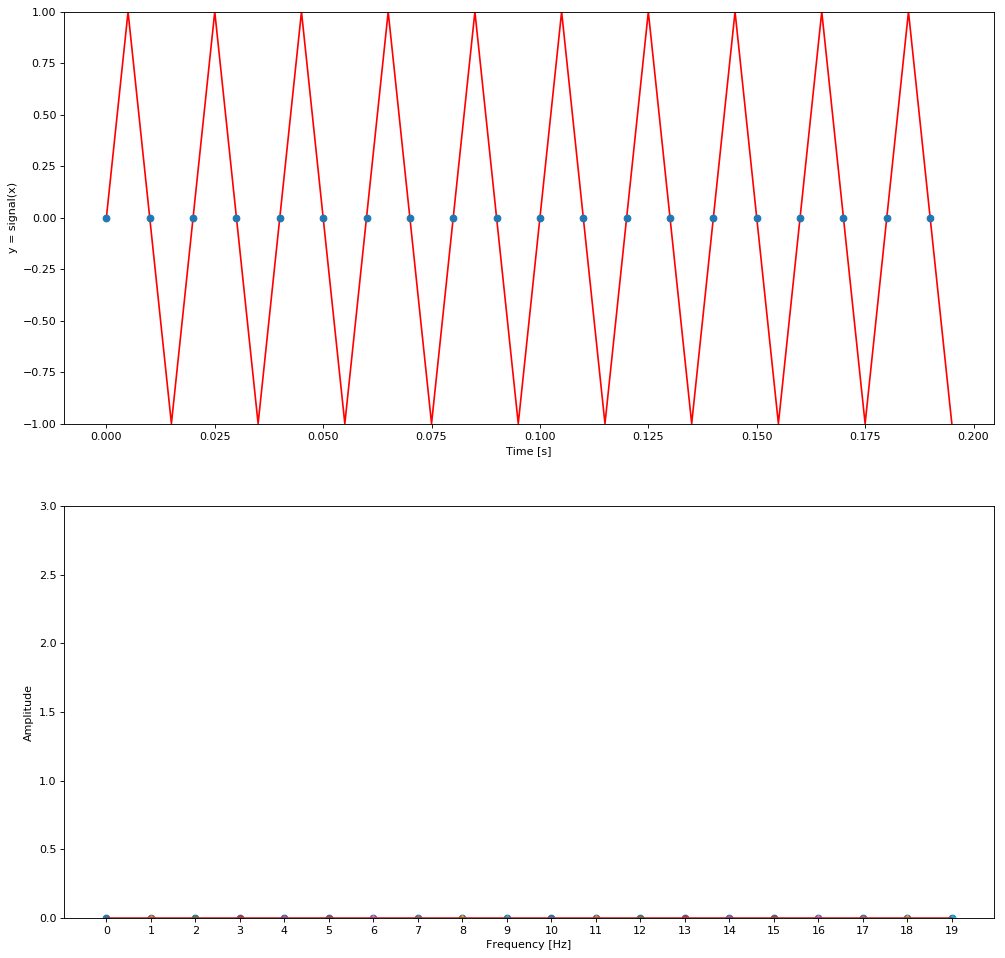

In [19]:
# f=50, w=100, A=1, LP=10
signal_f(f=50, w=100, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

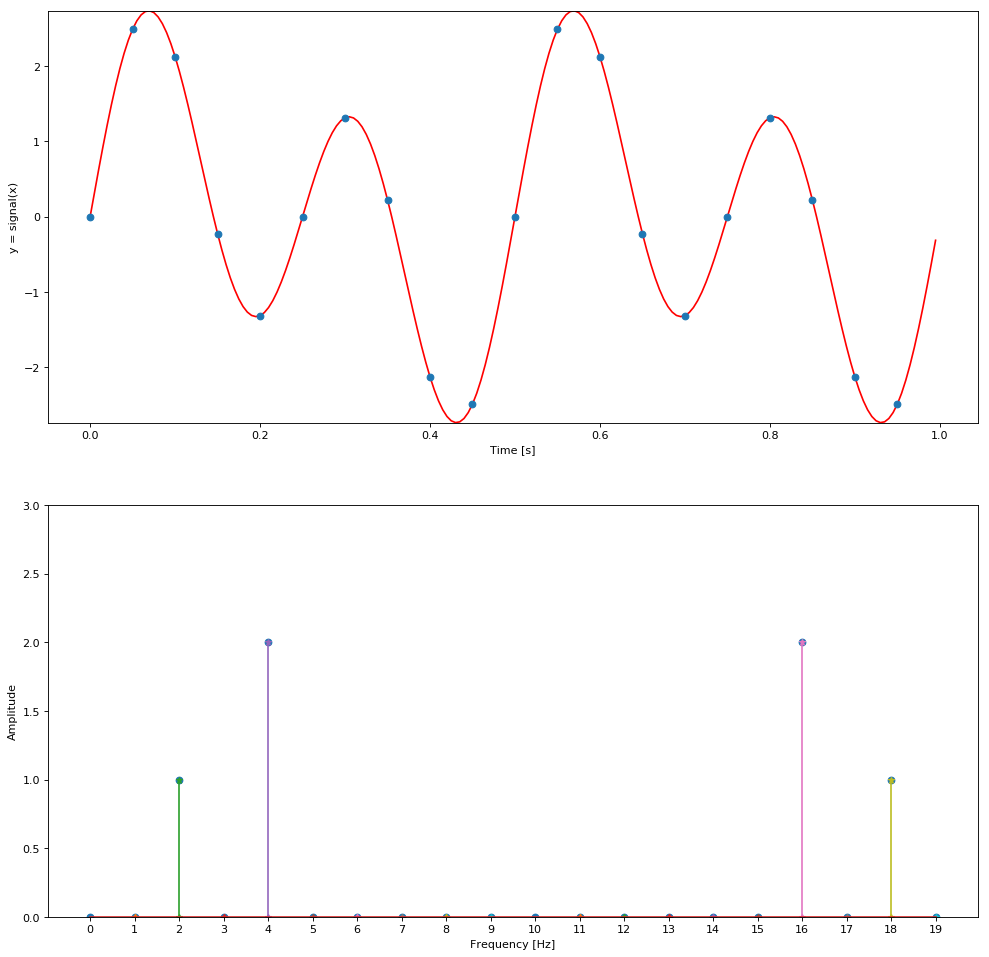

In [20]:
# Wyrysuj sygnał
def signal_f(A=1, LP= 1, w=40, f=2.0, FUNC = lambda t : A*sin(2*pi*t*f)):
    T = 1.0/f
    TW = 1.0/w
    t = np.arange(0, LP*T, TW)
    n = len(t)
    signal = FUNC(t)
    
    fig = plt.figure(figsize=(15, 15), dpi=80)   
    ax = fig.add_subplot(211)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)]) 
    ax.plot(t, signal, 'o')
    
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('y = signal(x)')

    signal1 = fft(signal)
    signal1 = abs(signal1)
    signal1=signal1/(w/2)/LP/T

    freqs = range(int(n))


    ax = fig.add_subplot(212)
    xticks = np.arange(0, len(t)+1, 1)
    ax.set_xticks(xticks)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude')
    
    show()

F = lambda t : A*sin(2*pi*t*f)+2*A*sin(4*pi*t*f)
    
signal_f(FUNC = F, f=1, w=20)

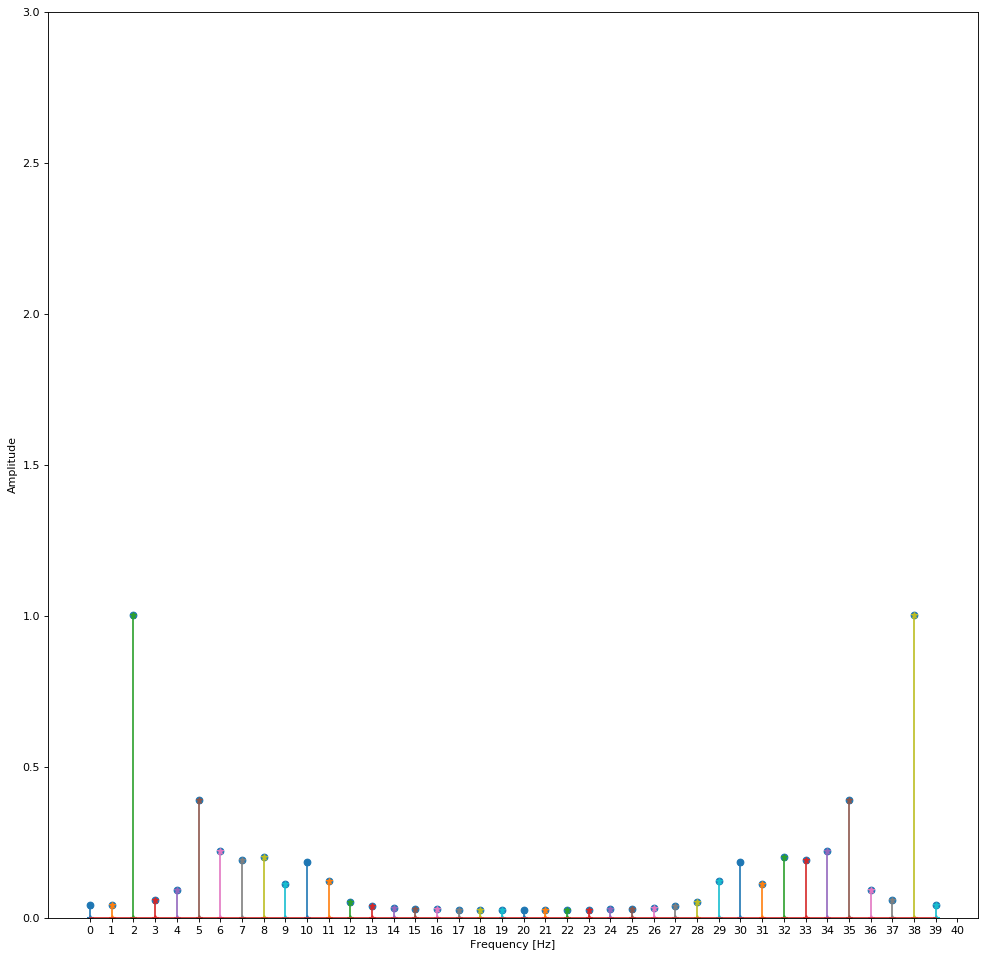

In [21]:
import random
def noise():
    A=1
    w=40
    f=2.0
    T = 1.0/f
    TW = 1.0/w
    t = np.arange(0, 1, TW)
    n = len(t)
    R=0

    FR = lambda t : A*sin(2*pi*t*f+R*pi)

    signal = FR(t)

    for x in range(100):
        A=random.randrange(2,9,1)
        A=A/100
        f=random.randrange(50,110,1)
        f=f/10
        R=random.randrange(0,21,1)
        R=R/10
        signal_R=FR(t)
        signal=signal+signal_R

    fig = plt.figure(figsize=(15, 15), dpi=80)   

    signal1 = fft(signal)
    signal1 = abs(signal1)
    signal1=signal1/(w)/T

    freqs = range(int(n))


    ax = fig.add_subplot(111)
    xticks = np.arange(0, len(t)+1, 1)
    ax.set_xticks(xticks)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude')
    
    show()

noise()
#na wykresie  sygnalu w dziedzinie czestotliwosci amplituda orginalnego sygnalu jest wyraznie wieksza od szumu

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

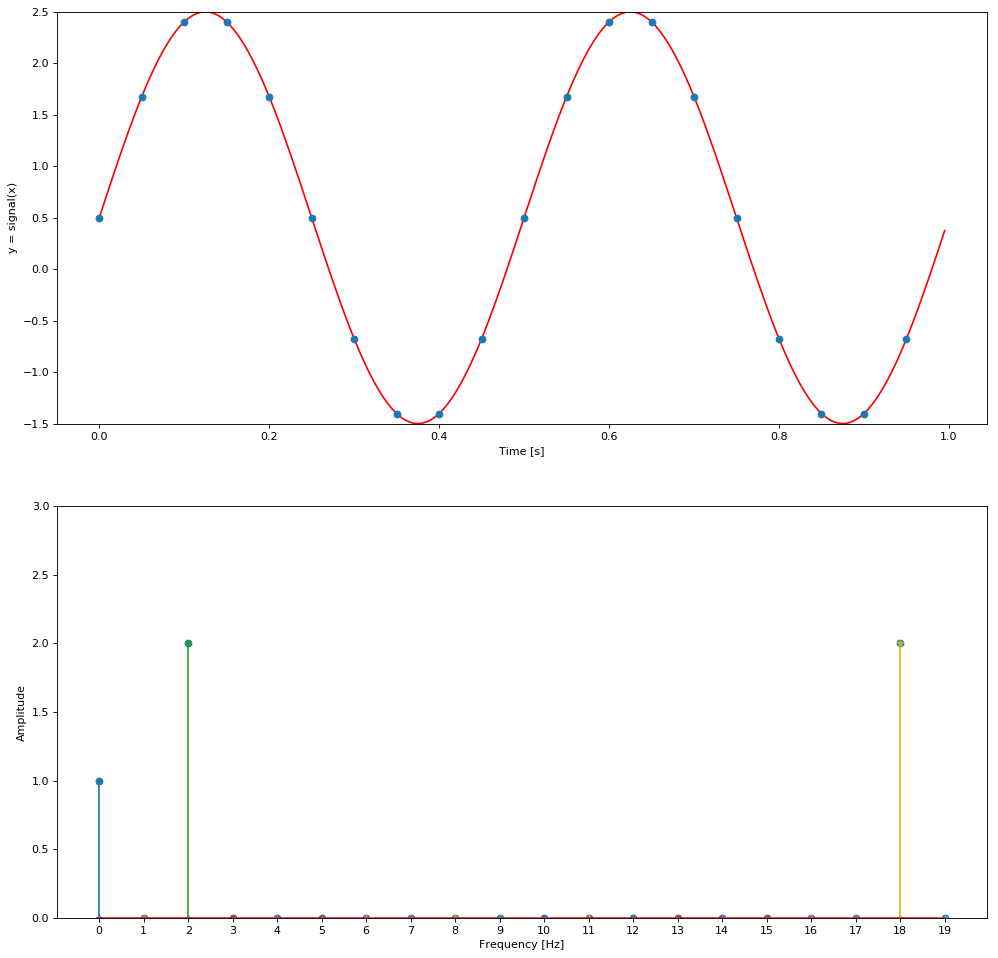

In [22]:
# Wyrysuj sygnał
F = lambda t : 0.5+2*sin(2*pi*t*f)
    
signal_f(FUNC = F, f=1, w=20)

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

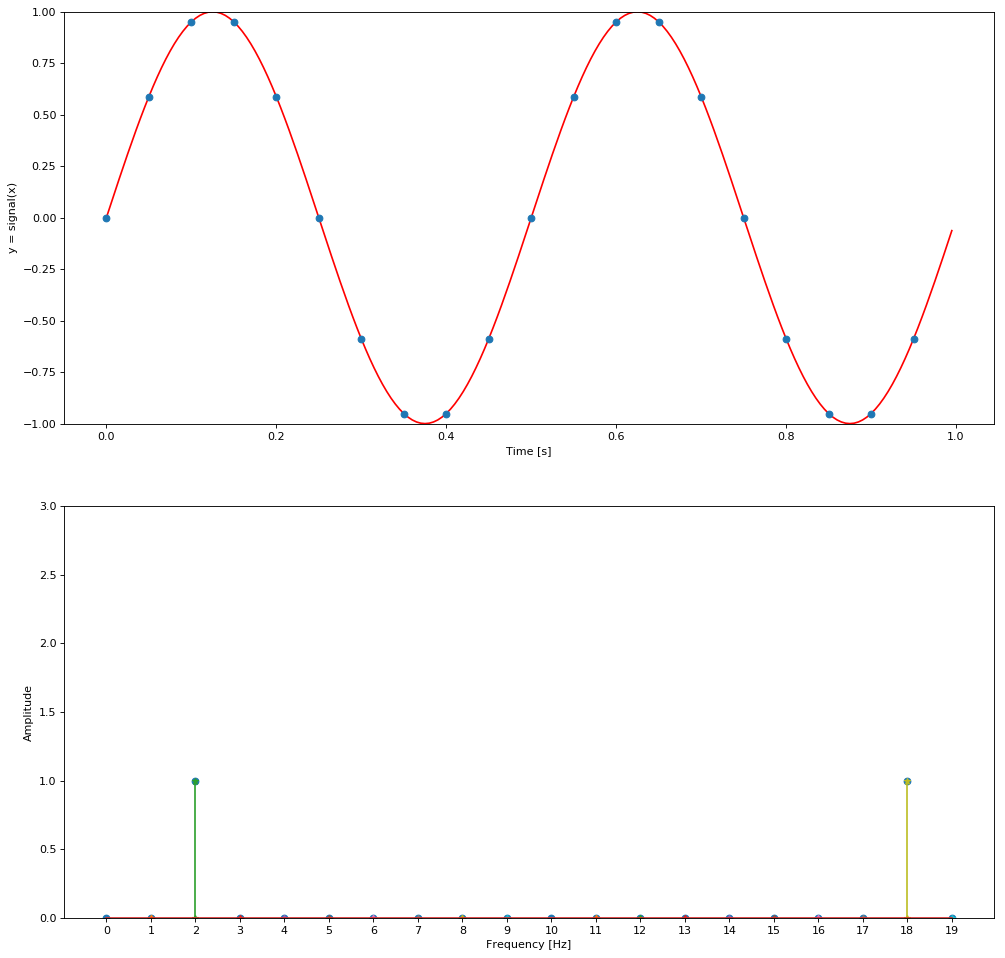

In [23]:
# faza = 0
F = lambda t : A*sin(2*pi*t*f)
    
signal_f(FUNC = F, f=1, w=20, A=1)

FC1 = lambda t : sin(2*pi*t)

T = 1.0
TW = 1.0/20
t = np.arange(0, T, TW)

S1=FC1(t)
S1=fft(S1)

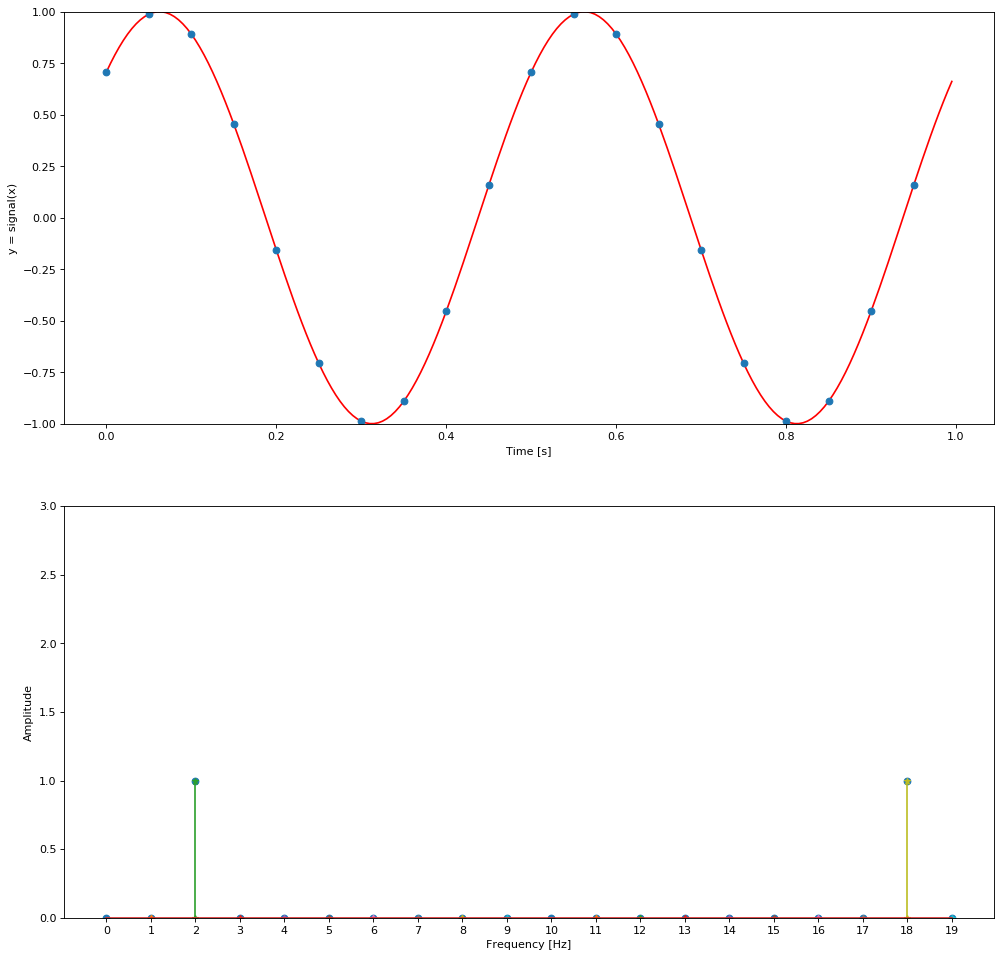

In [24]:
# faza = pi/4
F = lambda t : A*sin(2*pi*t*f+pi/4)
    
signal_f(FUNC = F, f=1, w=20, A=1)

FC2 = lambda t : sin(2*pi*t+pi/4)

T = 1.0
TW = 1.0/20
t = np.arange(0, T, TW)

S2=FC2(t)
S2=fft(S2)

In [25]:
print(angle(S1, deg=True))
print(angle(S2, deg=True))

[ 180.          -90.          124.99462317  -77.8891891    85.9484107
  -96.98747347  -33.85873721  115.68568737   14.65265471  180.
  180.         -180.          -14.65265471 -115.68568737   33.85873721
   96.98747347  -85.9484107    77.8891891  -124.99462317   90.        ]
[ 180.          -45.          136.78835371  176.53796963 -164.22567442
  -94.76364169  -20.92447619  -21.44732376   50.85867888   90.
  180.          -90.          -50.85867888   21.44732376   20.92447619
   94.76364169  164.22567442 -176.53796963 -136.78835371   45.        ]


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [28]:
# wygeneruj wektor x
x=np.random.random(10)
x_f=ifft(fft(x))
print(x)
print(x_f)

print(x-x_f)

#roznice miedzy x a ifft(fft(x)) sa pomijalne

[0.94279422 0.2604687  0.33294452 0.65997405 0.6564646  0.87641411
 0.10816764 0.07388425 0.01874843 0.62727014]
[0.94279422+0.j 0.2604687 +0.j 0.33294452+0.j 0.65997405+0.j
 0.6564646 +0.j 0.87641411+0.j 0.10816764+0.j 0.07388425+0.j
 0.01874843+0.j 0.62727014+0.j]
[ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
 -1.11022302e-16+0.j  0.00000000e+00+0.j -1.11022302e-16+0.j
 -5.55111512e-17+0.j -2.77555756e-17+0.j  2.08166817e-17+0.j
 -1.11022302e-16+0.j]


In [29]:
# oblicz fft z x
ft=fft(x)

In [30]:
# oblicz ifft
ift=ifft(ft)

In [31]:
#porownaj x z ifft(fft(x)), wystarczy print

In [32]:
print(ift)
print(x_f)
print(ift-x_f)
#brak roznic

[0.94279422+0.j 0.2604687 +0.j 0.33294452+0.j 0.65997405+0.j
 0.6564646 +0.j 0.87641411+0.j 0.10816764+0.j 0.07388425+0.j
 0.01874843+0.j 0.62727014+0.j]
[0.94279422+0.j 0.2604687 +0.j 0.33294452+0.j 0.65997405+0.j
 0.6564646 +0.j 0.87641411+0.j 0.10816764+0.j 0.07388425+0.j
 0.01874843+0.j 0.62727014+0.j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
